In [1]:
import os, fucoes_extras #Funcoes de diretorio e funcoes extras
from sklearn.model_selection import train_test_split #Importando Hold-out
import pandas as pd #Importando o pandas (leitor e escritor de arquivos)
from numpy import genfromtxt #Leitor de .csv e conversor p/ array numpy
from os import listdir #Importando buscador de arquivos
from machine_learn import svm_andre, rna_mlp #Importando SVM e RNA
import statistics
import numpy as np

In [2]:
diretorio= os.getcwd()+"/dados_csv/" #Busca o diretorio automaticamente

#Parametros p/ SVM
C= 1.0
gamma= 'auto'
kernel= 'rbf'

#Parametros p/ RNA
max_iter=300
hidden_layer_sizes= (100,) #Testar (50, 50) e (100, 100)
learning_rate= 'constant'
learning_rate_init= 0.01

In [3]:
acur_RNA= []
acur_SVM= []

acurB_RNA= []
acurB_SVM= []

matrizC_RNA= []
matrizC_SVM= []

media_SVM= []
des_SVM= []
media_RNA= []
des_RNA= []

mediaB_SVM= []
desB_SVM= []
mediaB_RNA= []
desB_RNA= []

matrizC_R= []
matrizC_S= []

extractor_name= []

In [4]:
for nome in listdir(diretorio):
    dados= genfromtxt((diretorio+nome), delimiter=',',skip_header=1)

    classCol = dados.shape[1] - 1
    y = dados[:,classCol]
    x = dados[:, :(classCol-1)]
    
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, 
                                                        random_state=13, stratify=None) #Hold-out
    
    datas = x_train, x_test, y_train, y_test
    HO_data = pd.DataFrame(np.array(datas)) #Lendo os valores p/ exportacao em .csv
    HO_data.to_csv('hold_out_data.csv') #Salvando em .csv
        
    #Treinando e avaliando o desempenho da SVM
    S= svm_andre.SVM(x_train, y_train, x_test, y_test, C, gamma, kernel)
    acur_SVM.append(S[0]) #Lista de acuracias
    acurB_SVM.append(S[1]) #Lista de acuracias balanceadas
    matrizC_SVM.append(S[2]) #Lista de matrizes de confusao
    
    #Treinando e avaliando o desempenho da RNA
    R= rna_mlp.RNAs(x_train, y_train, x_test, y_test, learning_rate_init,
                    learning_rate, hidden_layer_sizes, max_iter)
    acur_RNA.append(R[0]) #Lista de acuracias
    acurB_RNA.append(R[1]) #Lista de acuracias balanceadas
    matrizC_RNA.append(R[2]) #Lista de matrizes de confusao
    
    extractor_name.append(nome[:-4])

Matrizes de confusao:

LBP_GLCM 

SVM
215	51	0
0	305	0
0	37	47

RNA
266	0	0
32	267	6
1	71	12

LBP_HOG_3cells 

SVM
266	0	0
0	304	1
0	0	84

RNA
266	0	0
0	299	6
0	19	65

HOG_3cells 

SVM
266	0	0
0	304	1
0	0	84

RNA
262	4	0
0	231	74
0	0	84

LBP_GLCM_HOG_3cells 

SVM
254	12	0
0	305	0
0	14	70

RNA
266	0	0
2	268	35
0	0	84

GLCM_HOG_2cells 

SVM
252	14	0
0	305	0
0	14	70

RNA
266	0	0
0	289	16
0	1	83

LBP 

SVM
266	0	0
0	305	0
0	0	84

RNA
266	0	0
305	0	0
84	0	0

GLCM 

SVM
186	80	0
0	305	0
0	59	25

RNA
266	0	0
4	269	32
0	0	84

LBP_HOG_2cells 

SVM
266	0	0
0	304	1
0	0	84

RNA
265	1	0
6	249	50
0	0	84

LBP_GLCM_HOG_2cells 

SVM
253	13	0
0	305	0
0	14	70

RNA
266	0	0
0	294	11
0	1	83

HOG_2cells 

SVM
266	0	0
0	304	1
0	0	84

RNA
265	1	0
0	289	16
0	0	84

GLCM_HOG_3cells 

SVM
252	14	0
0	305	0
0	14	70

RNA
266	0	0
1	290	14
0	3	81

Resultados graficos:


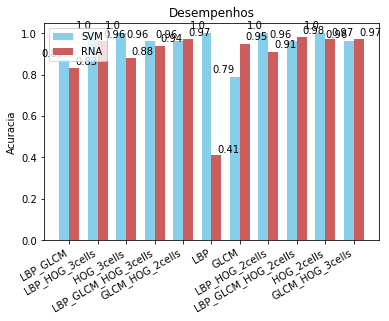

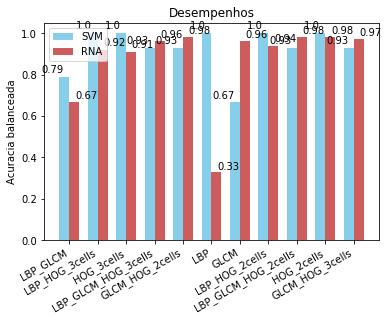

In [5]:
print("Matrizes de confusao:\n")

for i in range(0,len(extractor_name)):
    print('\033[1m'+extractor_name[i]+'\033[0m', "\n\nSVM")
    fucoes_extras.imprime_matriz(matrizC_SVM[i])
    print("RNA")
    fucoes_extras.imprime_matriz(matrizC_RNA[i])
    
print("Resultados graficos:")
fucoes_extras.grafico(acur_SVM, 0, acur_RNA, 0, extractor_name, "Acuracia")
fucoes_extras.grafico(acurB_SVM, 0, acurB_RNA, 0, extractor_name, "Acuracia balanceada")